In [13]:
# imports
import numpy as np
import keras
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
import json # NOTE: needed to be installed iirc (called 'json' I guess)
import cv2 # NOTE: for this to work, install 'opencv' in your environment!

In [14]:
# initialize stuffs
rawData = json.load(open('/Users/iosdev/Desktop/backend/ClothesPin/ml-train/fetch-images/data.json'))

# shirts (just increase the index of 'rawData' to work on the other items; 
# we'll train a new model for each item)
# 0 = shirts; 1 = coats; 2 = pants; 3 = shoes; 4 = hats; 5 = gloves
# (the order comes from the 'searches' array in fetch.js)
shirtData = rawData['3']
shirtImageItems = shirtData['images']

listOfImageUrls = []
listOfPrices = []
listOfActualImages = []

numOfItems = 1999 # amount of dl'ded images; make sure that it's correct!

In [15]:
# reformat data to work on it more easily

# note: the num of items will have to be manually entered, I'd guess...
# there could be a way to iterate through objects (which is what
# I guess 'rawData' is), but we have no time to find it at this point
for index in range(0, numOfItems):
    listOfImageUrls.append(shirtImageItems[str(index)]['url']) # indices are strings in the stupid object... whatever
    
for index in range(0, numOfItems):
    listOfPrices.append(shirtImageItems[str(index)]['price'])

for url in listOfImageUrls:
    
    # print(url)
    
    # read the image from the folder
    img = cv2.imread(url, cv2.IMREAD_COLOR)
    
    # print(img)
    
    listOfActualImages.append(img)

In [16]:
# reformatting continues (numpy stuffs)

# make numpy array from the image array (needed to use them for ml)
np_images = np.array(listOfActualImages)

# depending on how Python does stuffs under the hood, the order of the images vs. prices could 
# potentially be scrambled up by this point... we'll just have to hope for the best here
np_prices = np.array(listOfPrices)

# the inner arrays contain the rgb-values of the individual images.
# here we convert the values to be between 0-1 (from 0-255)
for innerArray in np_images:
    
    # this check should not be needed... for some reason though, the last element in the 
    # outer array was of 'NoneType' at one point. now that seems not to be the case anymore 
    # (even though I changed nothing...), but I'm leaving this check here just in case.
    # empty elements would f up the whole model, but we'll just have to hope for the best
    # here, due to lack of time...
    if innerArray is not None:
        innerArray = innerArray.astype('float32')
        innerArray /= 255
        # print(innerArray)

In [17]:
# separating a training set and test set from the whole set of images/prices:

trainLimit = numOfItems - 400 # the latter number is the amount of test images/prices; change as needed
testLimit = numOfItems # for clarity; could just use numOfItems

x_train = np_images[0:trainLimit]
x_test = np_images[trainLimit:testLimit]

y_train = np_prices[0:trainLimit]
y_test = np_prices[trainLimit:testLimit]

In [18]:
# building the actual ml model & using it:

model = keras.models.Sequential()

model.add(layers.Conv2D(filters=16,
        kernel_size=(2,2),
        strides=1,
        use_bias=True,
        padding='valid',
        input_shape=(140, 140, 3,), # initial image shape
        activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=2))

model.add(layers.Conv2D(filters=32,
        kernel_size=(2,2),
        strides=1,
        use_bias=True,
        padding='valid',
        activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Conv2D(filters=32,
        kernel_size=(2,2),
        strides=1,
        use_bias=True,
        padding='valid',
        activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Conv2D(filters=64,
        kernel_size=(2,2),
        strides=1,
        use_bias=True,
        padding='valid',
        activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Dense(120, activation='relu'))
model.add(layers.Flatten()) 
model.add(layers.Dense(1, activation='relu'))


# to make it readable by the Dense layer (supposedly... seems to work without it as well, sometimes -.-)
# model.add(layers.Flatten()) 

# model.add(layers.Dense(1, activation='relu')) # wtf does the first number even do here ???
# OR (perhaps): model.add(layers.Dense(1, input_shape=(28 * 28,), activation='relu'))
# NOTE: NO softmax activation should occur at any point!

model.compile(optimizer='adam', loss='mse', metrics=['acc']) # should not be changed (probably)
# original optimizer: sgd
# another: msprop

model.summary()

hist = model.fit(x_train, y_train, epochs=10, batch_size=50, validation_data=(x_test,y_test))




















# conv - pool - conv - pool - dense layer -- those were Peter's instructions... Something is very wrong here though, 
# because after the first epoch, the loss function stops decreasing, leaving us with ZERO accuracy
# (yeah, I actually managed to make things worse from my initial effort :p)




# example stuffs (do NOT activate as they are !!!):


# Daniel's stuffs: 
# model.add(layers.Conv2D(96, (4, 4), strides = 2,padding ='valid', activation = 'relu', input_shape = (140,140,3)))

"""
model.add(layers.Conv2D(140,1,strides=1,padding='valid',activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(layers.Conv2D(210,1,strides=1,padding='valid',activation='relu'))
model.add(layers.Conv2D(210,1,strides=1,padding='valid',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))
"""



# do NOT use these two!! (I'm *pretty* sure...)
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)

# model.add(Conv2D(filters=16, kernel_size=5, strides=1, use_bias=False, padding='valid', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
# model.add(Dense(400, activation='relu'))
# model.add(Dense(120))
# model.add(Activation('relu'))
# model.add(layers.Dense(256, activation='relu', input_dim=1 * 1 * 512))

"""
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(140, 140, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80, 80, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(layers.Dense(46, input_shape=(28 * 28,), activation='relu'))

preds = model.predict(x_test)

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))
"""

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 139, 139, 16)      208       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 68, 68, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 67, 67, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 64)        8256      
__________

"\nmodel.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(140, 140, 3)))\nmodel.add(layers.MaxPooling2D((2, 2)))\nmodel.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(80, 80, 3)))\nmodel.add(layers.MaxPooling2D((4, 4)))\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(46, input_shape=(28 * 28,), activation='relu'))\n\npreds = model.predict(x_test)\n\nplt.plot(y_test, preds, 'ro')\nplt.plot([0,10], [0,10], 'b')\n\nprint(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))\n"

In [ ]:
# visualizing the model / training:



acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# print(model.predict(digitimage.reshape(-1, 28*28)))

model.save('shoe_model.h5')






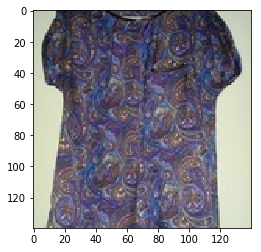

In [10]:
# print(np_images.shape)
# print(np_prices.shape)

# print example image, to see that it all works:
image1 = np_images[0]

plt.imshow(image1, cmap = plt.cm.binary)
plt.show()

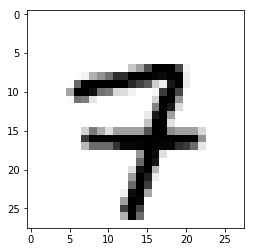

7


In [3]:
# leftover / example stuffs... xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

exampleindex = 324
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [4]:
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(28 * 28,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 3.9207
Epoch 2/10
60000/60000 [==============================] - 1s 23us/step - loss: 3.4265
Epoch 3/10
60000/60000 [==============================] - 1s 23us/step - loss: 3.3605
Epoch 4/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3366
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3217
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3164
Epoch 7/10
60000/60000 [==============================] - 1s 24us/step - loss: 3.3094
Epoch 8/10
60000/60000 [==============================] - 1s 25us/step - loss: 3.3011
Epoch 9/10
60000/60000 [==============================] - 2s 26us/step - loss: 3.3027
Epoch 10/10
60000/60000 [==============================] - 2s 25us/step - loss: 3.2986


In [7]:
preds = model.predict(x_test)

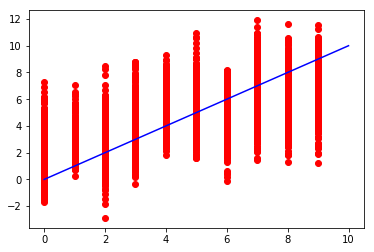

In [8]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')

In [9]:
print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))

0.218
